In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
hr = pd.read_csv('HR_comma_sep.csv')

In [3]:
hr

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


In [7]:
from sklearn.model_selection import train_test_split

In [6]:
hr.salary.unique()

array(['low', 'medium', 'high'], dtype=object)

In [8]:
hr.salary.value_counts()

low       7316
medium    6446
high      1237
Name: salary, dtype: int64

In [12]:
import seaborn as sns

In [13]:
cols = ['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years']

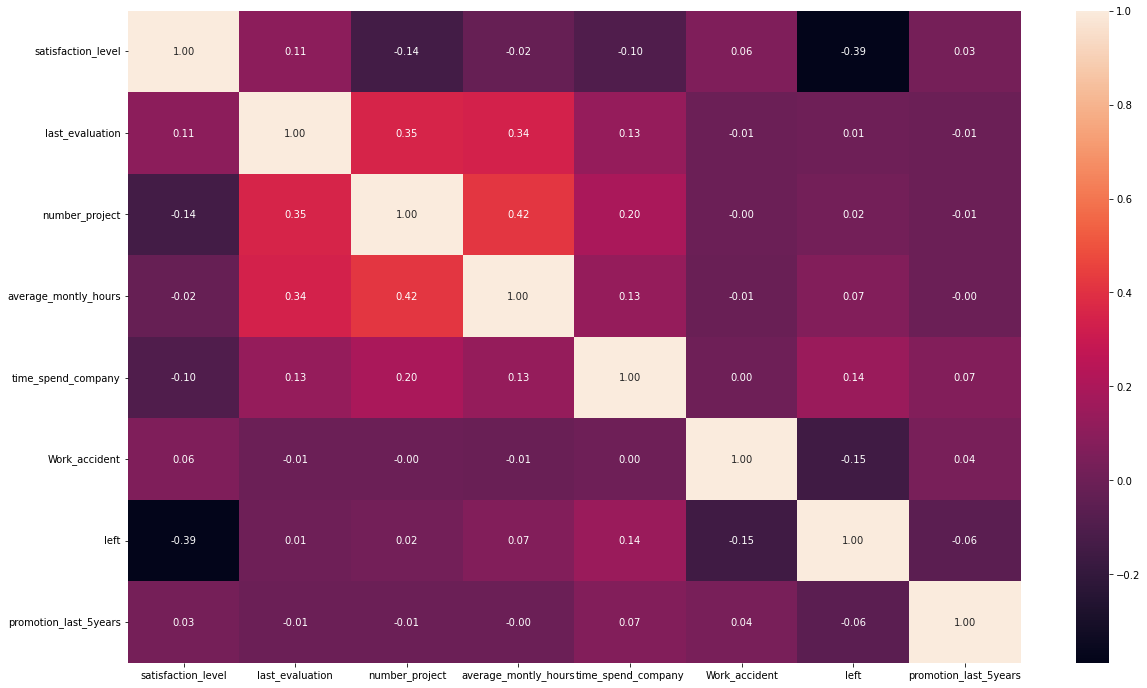

In [14]:
fig = plt.figure(figsize=(20,12))
corr = hr[cols].corr()
sns.heatmap(corr,cbar= True, annot = True, fmt = '.2f', annot_kws = {'size':10}, yticklabels =cols, xticklabels = cols )
plt.show()

From the heatmap, there seems to be heavy positive(+) correlation between projectCount, averageMonthlyHours, and evaluation. Which could mean that the employees who spent more hours and did more projects were evaluated highly. But the feature evaluation, when compared independently with the response variable turnover, shows little to no relationship. What does this mean? For the negative(-) relationships, turnover, satisfaction, and salary are highly correlated. I'm assuming that people tend to leave a company more when they are less satisfied and are lowly paid.

In [15]:
dummies = pd.get_dummies(hr.salary)
dummies.head()

,high,low,medium
0,0,1,0
1,0,0,1
2,0,0,1
3,0,1,0
4,0,1,0


In [16]:
merged = pd.concat([hr, dummies], axis=1)
merged.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary,high,low,medium
0,0.38,0.53,2,157,3,0,1,0,sales,low,0,1,0
1,0.80,0.86,5,262,6,0,1,0,sales,medium,0,0,1
2,0.11,0.88,7,272,4,0,1,0,sales,medium,0,0,1
3,0.72,0.87,5,223,5,0,1,0,sales,low,0,1,0
4,0.37,0.52,2,159,3,0,1,0,sales,low,0,1,0


In [17]:
final = merged.drop(["salary"], axis=1)
final.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,high,low,medium
0,0.38,0.53,2,157,3,0,1,0,sales,0,1,0
1,0.80,0.86,5,262,6,0,1,0,sales,0,0,1
2,0.11,0.88,7,272,4,0,1,0,sales,0,0,1
3,0.72,0.87,5,223,5,0,1,0,sales,0,1,0
4,0.37,0.52,2,159,3,0,1,0,sales,0,1,0


In [19]:
y = hr.left
y.head()

0    1
1    1
2    1
3    1
4    1
Name: left, dtype: int64

In [35]:
X = final[['satisfaction_level','last_evaluation','number_project','average_montly_hours','time_spend_company','Work_accident','promotion_last_5years','high','low','medium']]
X

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,high,low,medium
0,0.38,0.53,2,157,3,0,0,0,1,0
1,0.80,0.86,5,262,6,0,0,0,0,1
2,0.11,0.88,7,272,4,0,0,0,0,1
3,0.72,0.87,5,223,5,0,0,0,1,0
4,0.37,0.52,2,159,3,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,0,0,1,0
14995,0.37,0.48,2,160,3,0,0,0,1,0
14996,0.37,0.53,2,143,3,0,0,0,1,0
14997,0.11,0.96,6,280,4,0,0,0,1,0


In [21]:
from sklearn.model_selection import train_test_split

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.6)

In [42]:
from sklearn.linear_model import LogisticRegression

In [43]:
model = LogisticRegression(solver='lbfgs', max_iter=150)

In [44]:
final.dtypes

satisfaction_level       float64
last_evaluation          float64
number_project             int64
average_montly_hours       int64
time_spend_company         int64
Work_accident              int64
left                       int64
promotion_last_5years      int64
Department                object
high                       uint8
low                        uint8
medium                     uint8
dtype: object

In [45]:
model.fit(X_train, y_train)

C:\Users\Vineyard\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=150)

In [46]:
model.predict(X_test)

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [ ]:
X = hr[['satisfaction_level','last_evaluation','number_project','average_montly_hours','time_spend_company','Work_accident','promotion_last_5years']]
y = hr['left']

In [47]:
model.score(X_test, y_test)

0.8038333333333333